In [1]:
pip install numpy matplotlib Pillow pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\anaconda\lib\site-packages (1.26.4)



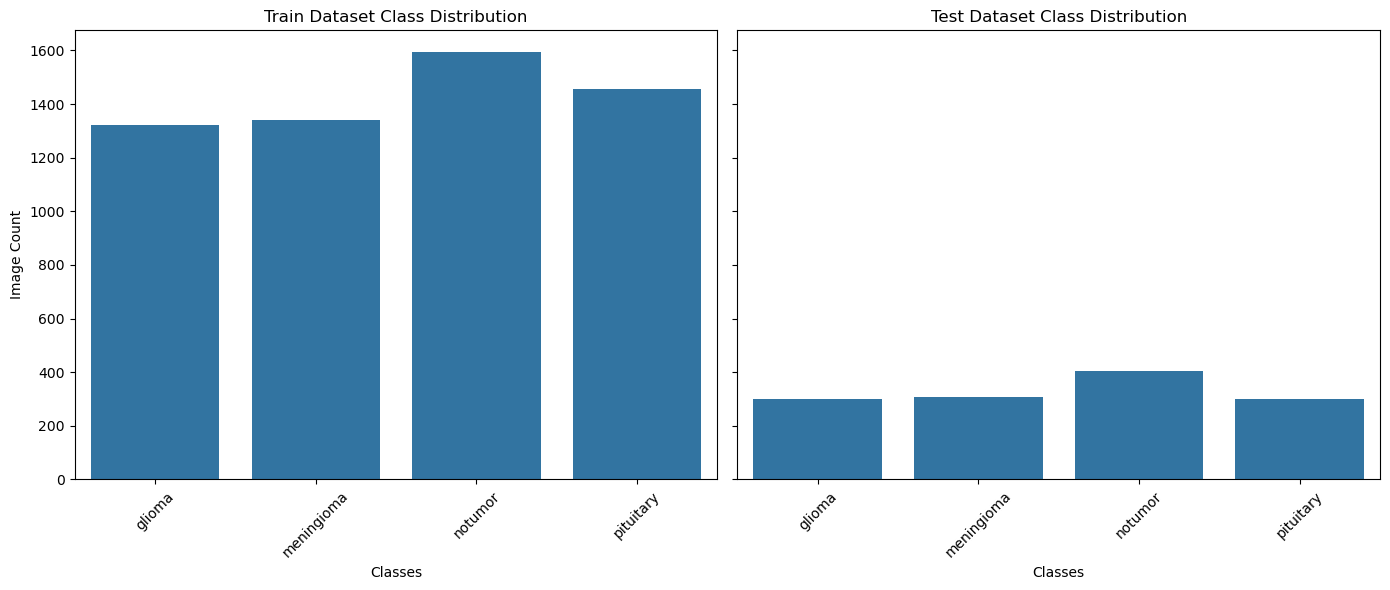

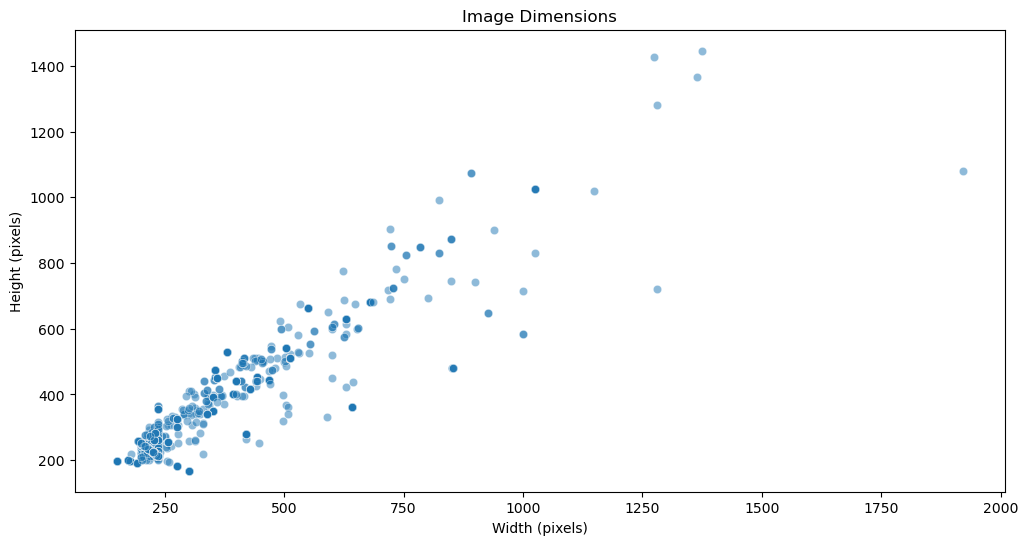

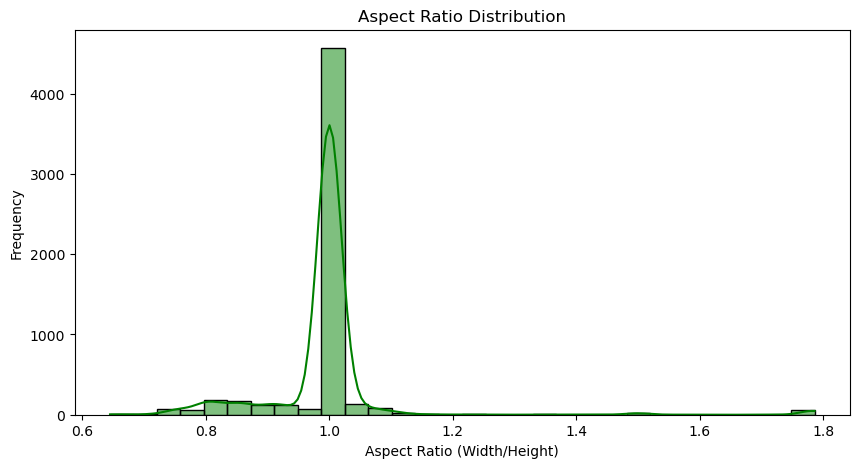

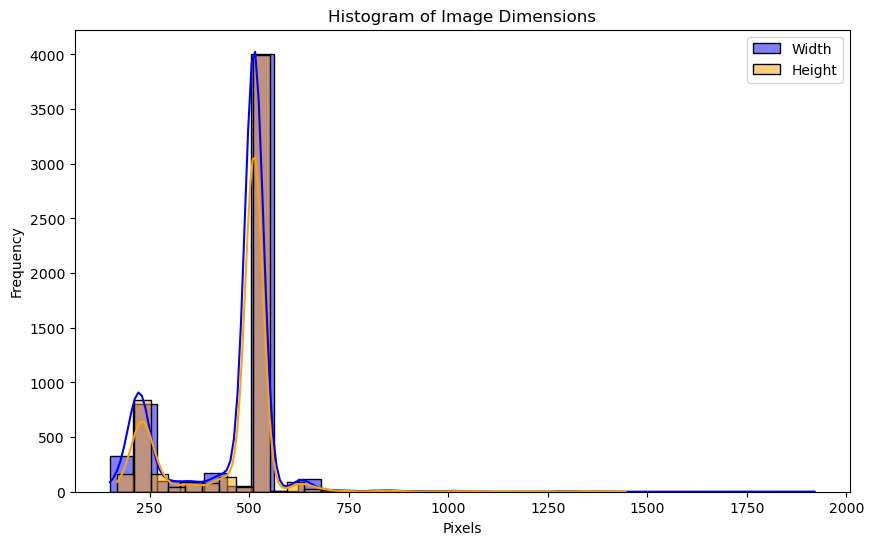

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict

def explore_dataset(train_dir, test_dir):
    """
    Function to explore the dataset.
    """
    dataset_info = {'train': defaultdict(list), 'test': defaultdict(list)}

    for dtype, directory in [('train', train_dir), ('test', test_dir)]:
        classes = os.listdir(directory)

        for cls in classes:
            class_path = os.path.join(directory, cls)
            images = [f for f in os.listdir(class_path) if f.endswith(('jpg', 'jpeg', 'png'))]
            dataset_info[dtype]['classes'].append(cls)
            dataset_info[dtype]['image_counts'].append(len(images))

    return dataset_info

def plot_class_distribution(dataset_info):
    """
    Plot class distribution for train and test datasets.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    for idx, dtype in enumerate(['train', 'test']):
        sns.barplot(
            x=dataset_info[dtype]['classes'],
            y=dataset_info[dtype]['image_counts'],
            ax=axes[idx]
        )
        axes[idx].set_title(f"{dtype.capitalize()} Dataset Class Distribution")
        axes[idx].set_ylabel("Image Count")
        axes[idx].set_xlabel("Classes")
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def calculate_image_stats(directory):
    """
    Function to calculate image statistics.
    """
    image_sizes = []
    aspect_ratios = []

    for cls in os.listdir(directory):
        class_path = os.path.join(directory, cls)
        for img_file in os.listdir(class_path):
            if img_file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_sizes.append((width, height))
                    aspect_ratios.append(width / height)

    return image_sizes, aspect_ratios

def plot_image_stats(image_sizes, aspect_ratios):
    """
    Visualize image statistics.
    """
    sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=sizes_df, x='Width', y='Height', alpha=0.5)
    plt.title("Image Dimensions")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(aspect_ratios, kde=True, bins=30, color="green")
    plt.title("Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.show()

def plot_heatmap(image_sizes):
    """
    Create a heatmap of image dimensions.
    """
    sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
    heatmap_data = sizes_df.pivot_table(index='Height', columns='Width', aggfunc=len, fill_value=0)

    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Image Dimensions")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.show()

def plot_histogram(image_sizes):
    """
    Plot a histogram of image dimensions.
    """
    sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

    plt.figure(figsize=(10, 6))
    sns.histplot(sizes_df['Width'], bins=30, kde=True, color="blue", label="Width")
    sns.histplot(sizes_df['Height'], bins=30, kde=True, color="orange", label="Height")
    plt.title("Histogram of Image Dimensions")
    plt.xlabel("Pixels")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Define the dataset directories
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Explore dataset
dataset_info = explore_dataset(train_dir, test_dir)

# Plot class distributions
plot_class_distribution(dataset_info)

# Calculate and visualize image stats
train_image_sizes, train_aspect_ratios = calculate_image_stats(train_dir)
plot_image_stats(train_image_sizes, train_aspect_ratios)

# Plot histogram
plot_histogram(train_image_sizes)



Analyzing train directory: C:\Users\manik\Downloads\ML DATASET HENRY\Training

Analyzing test directory: C:\Users\manik\Downloads\ML DATASET HENRY\Testing

TRAIN SET SUMMARY:
--------------------------------------------------
Total images: 5712

Class distribution:
glioma: 1321 images (23.13%)
meningioma: 1339 images (23.44%)
notumor: 1595 images (27.92%)
pituitary: 1457 images (25.51%)

Image size statistics:
Average dimensions: 451.6x453.9
Dimension range: 150x168 to 1920x1446

File size statistics:
Average size: 0.02MB
Size range: 0.00MB to 0.69MB

TEST SET SUMMARY:
--------------------------------------------------
Total images: 1311

Class distribution:
glioma: 300 images (22.88%)
meningioma: 306 images (23.34%)
notumor: 405 images (30.89%)
pituitary: 300 images (22.88%)

Image size statistics:
Average dimensions: 421.2x424.2
Dimension range: 150x168 to 1149x1019

File size statistics:
Average size: 0.02MB
Size range: 0.00MB to 0.12MB


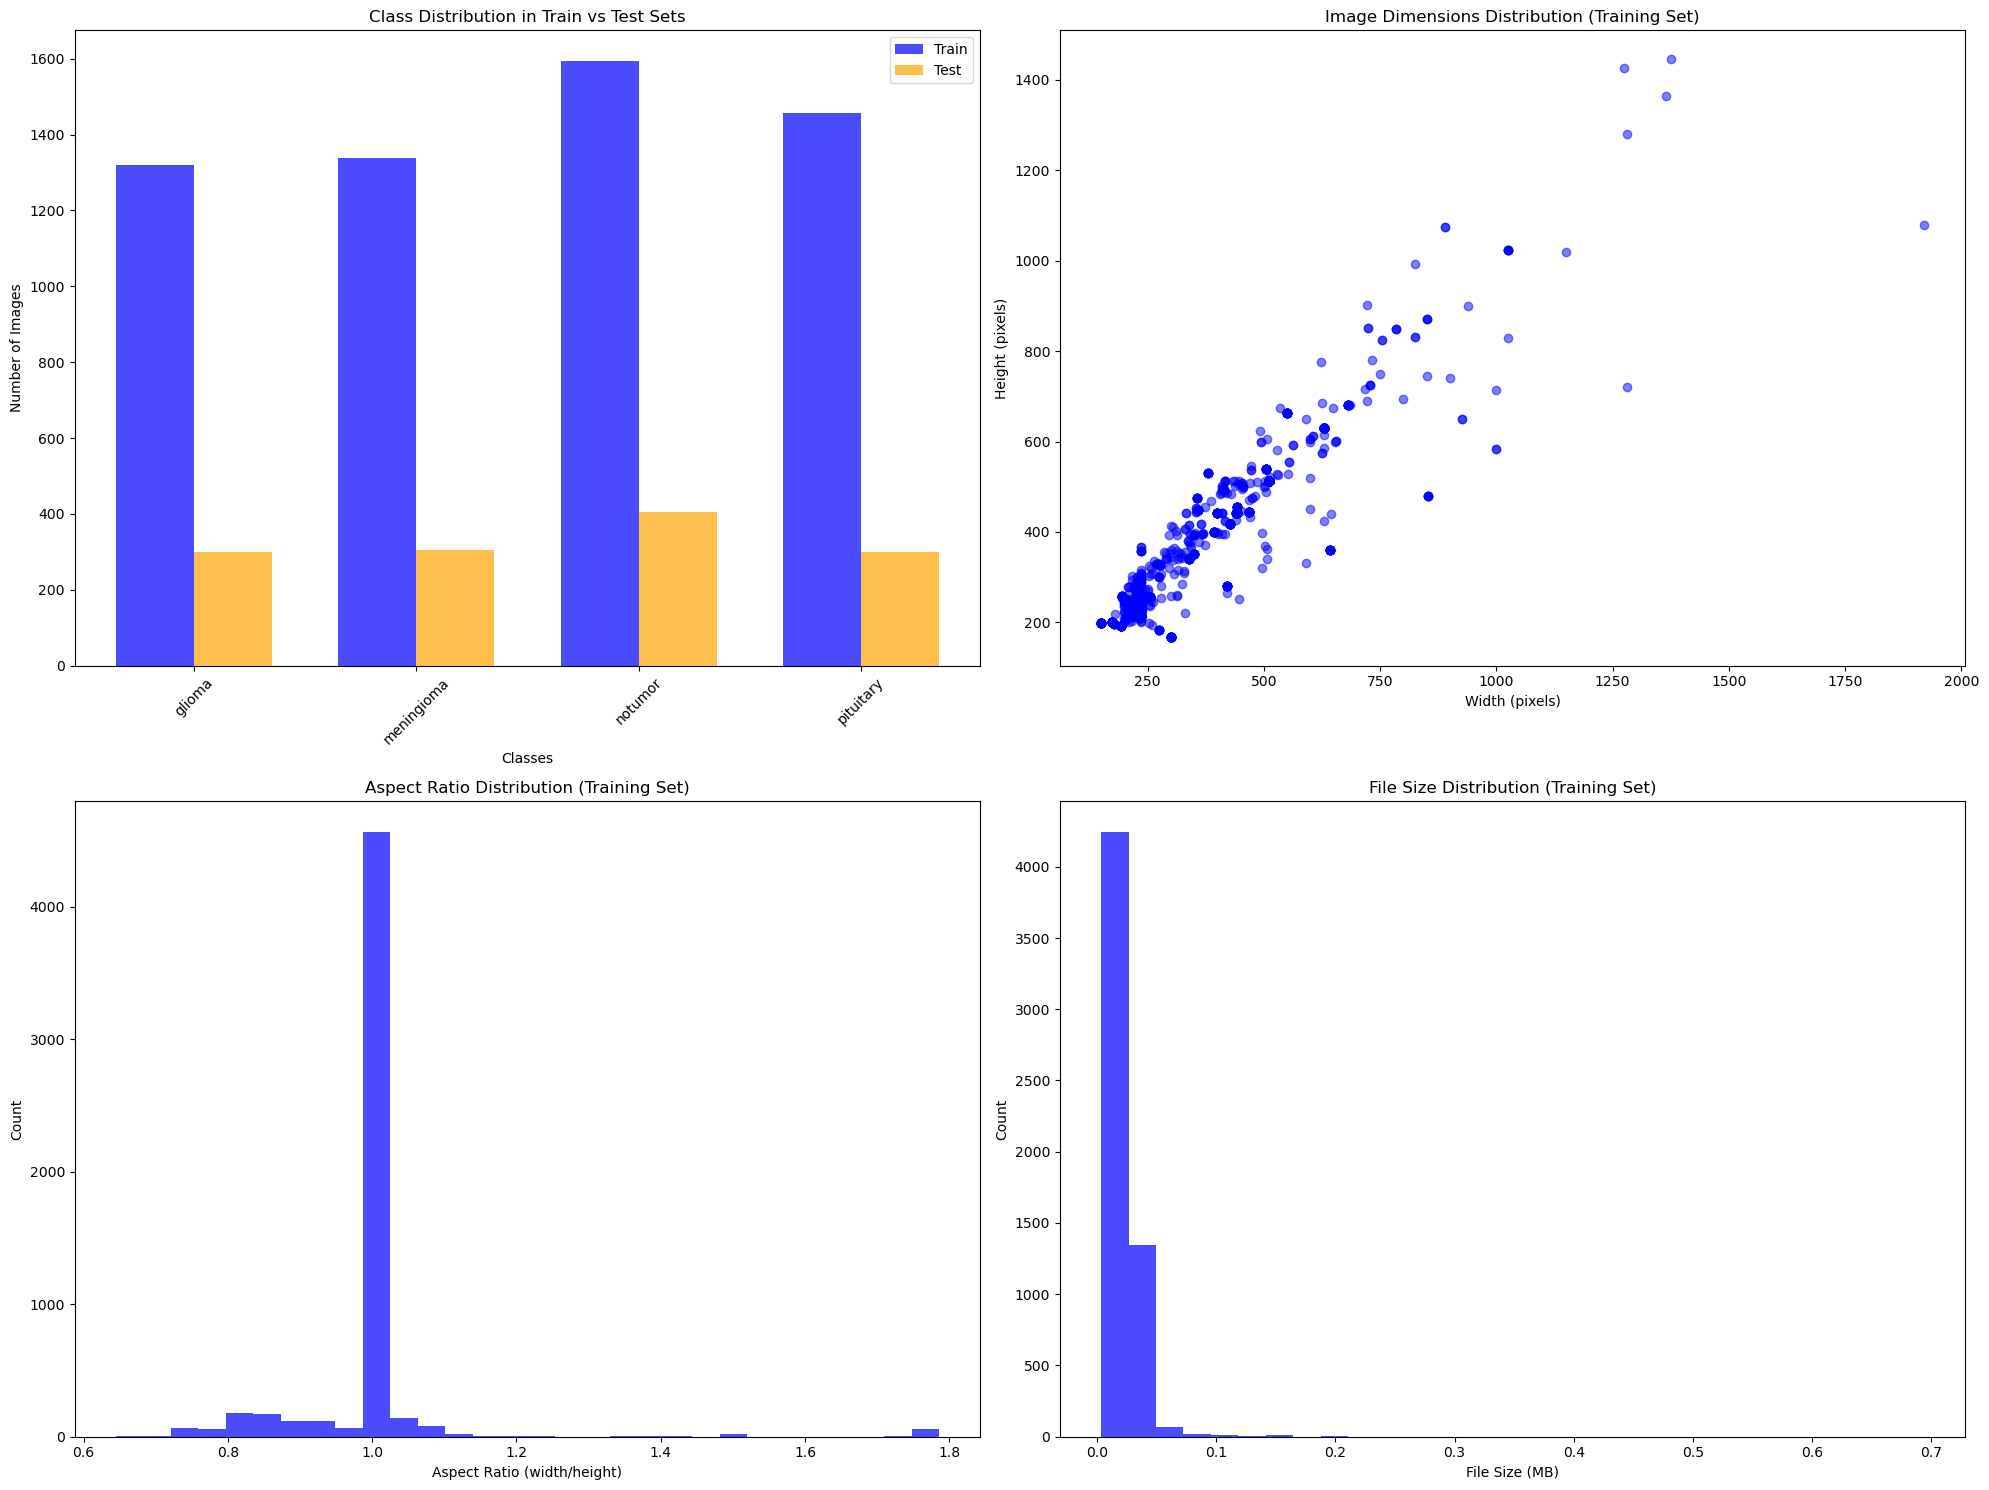

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from collections import defaultdict

def analyze_image_dataset(train_dir, test_dir):
    """
    Perform comprehensive EDA on image dataset
    """
    # Initialize dictionaries to store information
    dataset_info = {
        'train': defaultdict(list),
        'test': defaultdict(list)
    }
    
    # Analyze both training and testing directories
    for dataset_type, directory in [('train', train_dir), ('test', test_dir)]:
        print(f"\nAnalyzing {dataset_type} directory: {directory}")
        
        # Get all classes (subdirectories)
        classes = os.listdir(directory)
        
        total_images = 0
        class_distribution = {}
        image_sizes = []
        aspect_ratios = []
        file_sizes = []
        
        # Analyze each class
        for class_name in classes:
            class_path = os.path.join(directory, class_name)
            if not os.path.isdir(class_path):
                continue
                
            # Count images in class
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            num_images = len(images)
            total_images += num_images
            class_distribution[class_name] = num_images
            
            # Analyze individual images
            for img_name in images:
                img_path = os.path.join(class_path, img_name)
                try:
                    # Get image properties
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_sizes.append((width, height))
                        aspect_ratios.append(width/height)
                    
                    # Get file size in MB
                    file_sizes.append(os.path.getsize(img_path) / (1024 * 1024))
                    
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")
        
        # Store results
        dataset_info[dataset_type]['total_images'] = total_images
        dataset_info[dataset_type]['class_distribution'] = class_distribution
        dataset_info[dataset_type]['image_sizes'] = image_sizes
        dataset_info[dataset_type]['aspect_ratios'] = aspect_ratios
        dataset_info[dataset_type]['file_sizes'] = file_sizes
    
    return dataset_info

def plot_dataset_analysis(dataset_info):
    """
    Create visualizations for the dataset analysis
    """
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Class Distribution Comparison
    plt.subplot(2, 2, 1)
    train_dist = dataset_info['train']['class_distribution']
    test_dist = dataset_info['test']['class_distribution']
    
    x = np.arange(len(train_dist))
    width = 0.35
    
    plt.bar(x - width/2, list(train_dist.values()), width, label='Train', color='blue', alpha=0.7)
    plt.bar(x + width/2, list(test_dist.values()), width, label='Test', color='orange', alpha=0.7)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Train vs Test Sets')
    plt.xticks(x, list(train_dist.keys()), rotation=45)
    plt.legend()
    
    # 2. Image Size Distribution
    plt.subplot(2, 2, 2)
    train_sizes = np.array(dataset_info['train']['image_sizes'])
    plt.scatter(train_sizes[:, 0], train_sizes[:, 1], alpha=0.5, color='blue')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title('Image Dimensions Distribution (Training Set)')
    
    # 3. Aspect Ratio Distribution
    plt.subplot(2, 2, 3)
    plt.hist(dataset_info['train']['aspect_ratios'], bins=30, color='blue', alpha=0.7)
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Count')
    plt.title('Aspect Ratio Distribution (Training Set)')
    
    # 4. File Size Distribution
    plt.subplot(2, 2, 4)
    plt.hist(dataset_info['train']['file_sizes'], bins=30, color='blue', alpha=0.7)
    plt.xlabel('File Size (MB)')
    plt.ylabel('Count')
    plt.title('File Size Distribution (Training Set)')
    
    plt.tight_layout()
    plt.show()

def print_dataset_summary(dataset_info):
    """
    Print summary statistics for the dataset
    """
    for dataset_type in ['train', 'test']:
        print(f"\n{dataset_type.upper()} SET SUMMARY:")
        print("-" * 50)
        print(f"Total images: {dataset_info[dataset_type]['total_images']}")
        print("\nClass distribution:")
        for class_name, count in dataset_info[dataset_type]['class_distribution'].items():
            print(f"{class_name}: {count} images ({count/dataset_info[dataset_type]['total_images']*100:.2f}%)")
        
        # Calculate average image dimensions
        sizes = np.array(dataset_info[dataset_type]['image_sizes'])
        print(f"\nImage size statistics:")
        print(f"Average dimensions: {sizes[:, 0].mean():.1f}x{sizes[:, 1].mean():.1f}")
        print(f"Dimension range: {sizes[:, 0].min()}x{sizes[:, 1].min()} to {sizes[:, 0].max()}x{sizes[:, 1].max()}")
        
        # File size statistics
        file_sizes = dataset_info[dataset_type]['file_sizes']
        print(f"\nFile size statistics:")
        print(f"Average size: {np.mean(file_sizes):.2f}MB")
        print(f"Size range: {np.min(file_sizes):.2f}MB to {np.max(file_sizes):.2f}MB")

# Add error handling for the main execution
def main():
    try:
        # Define your paths
        train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
        test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'
        
        # Run analysis
        dataset_info = analyze_image_dataset(train_dir, test_dir)
        
        # Print summary
        print_dataset_summary(dataset_info)
        
        # Create visualizations
        plot_dataset_analysis(dataset_info)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check if the directory paths are correct and accessible.")

if __name__ == "__main__":
    main()


Analyzing train directory: C:\Users\manik\Downloads\ML DATASET HENRY\Training

Analyzing test directory: C:\Users\manik\Downloads\ML DATASET HENRY\Testing


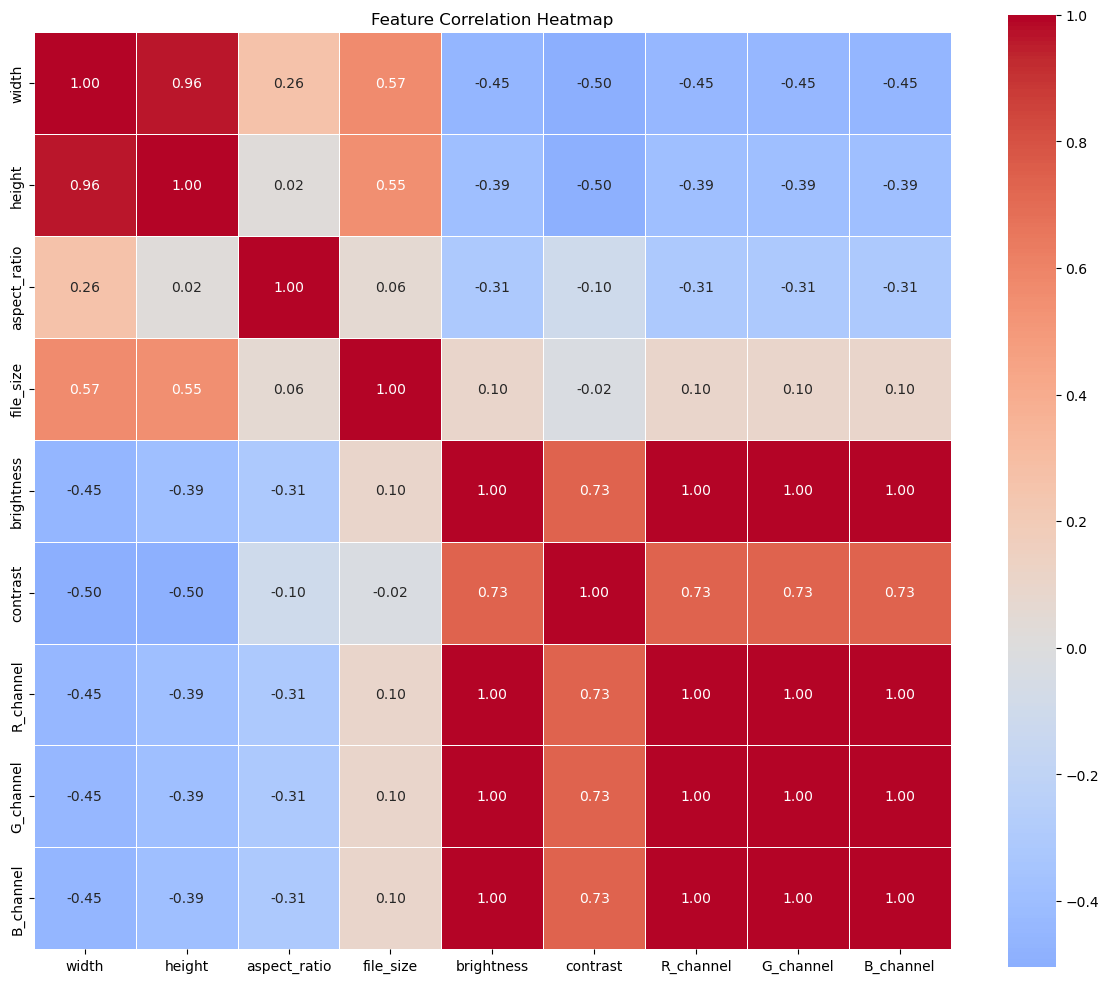

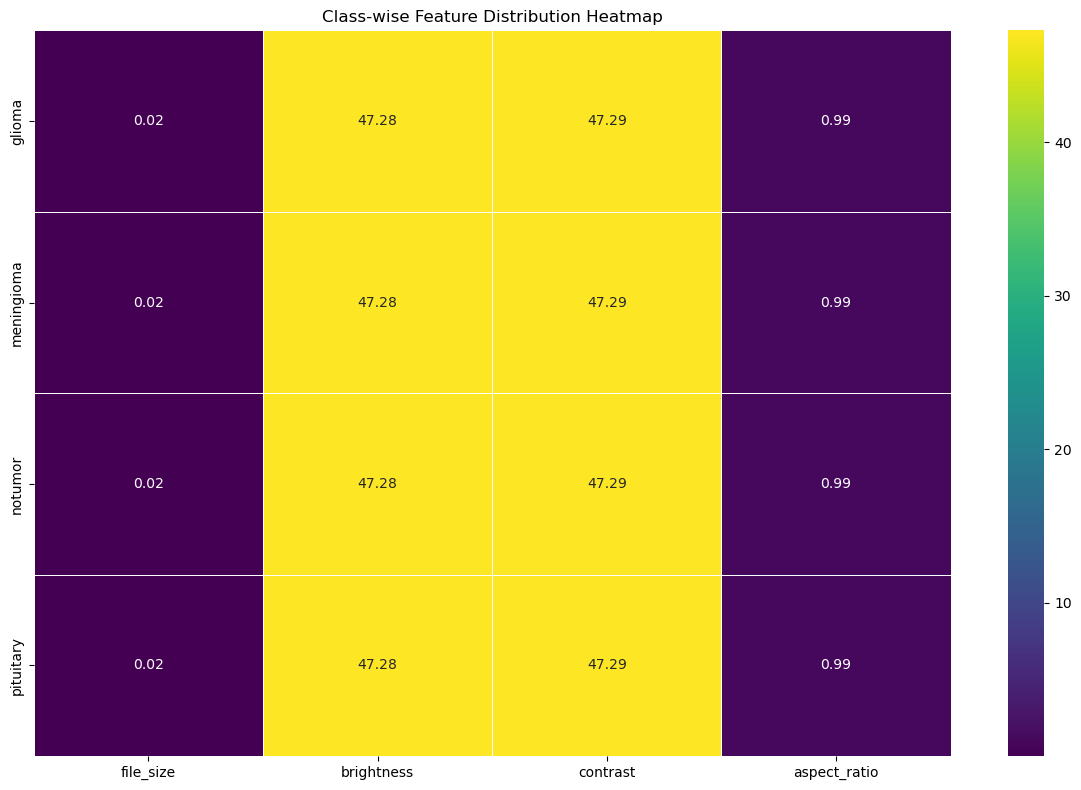

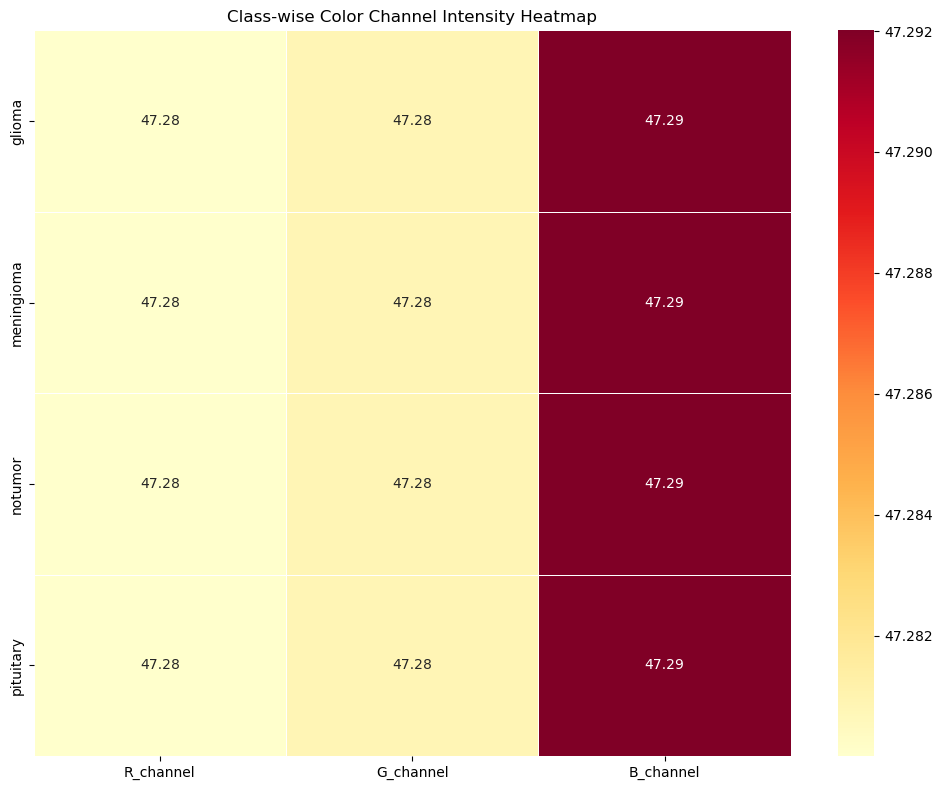

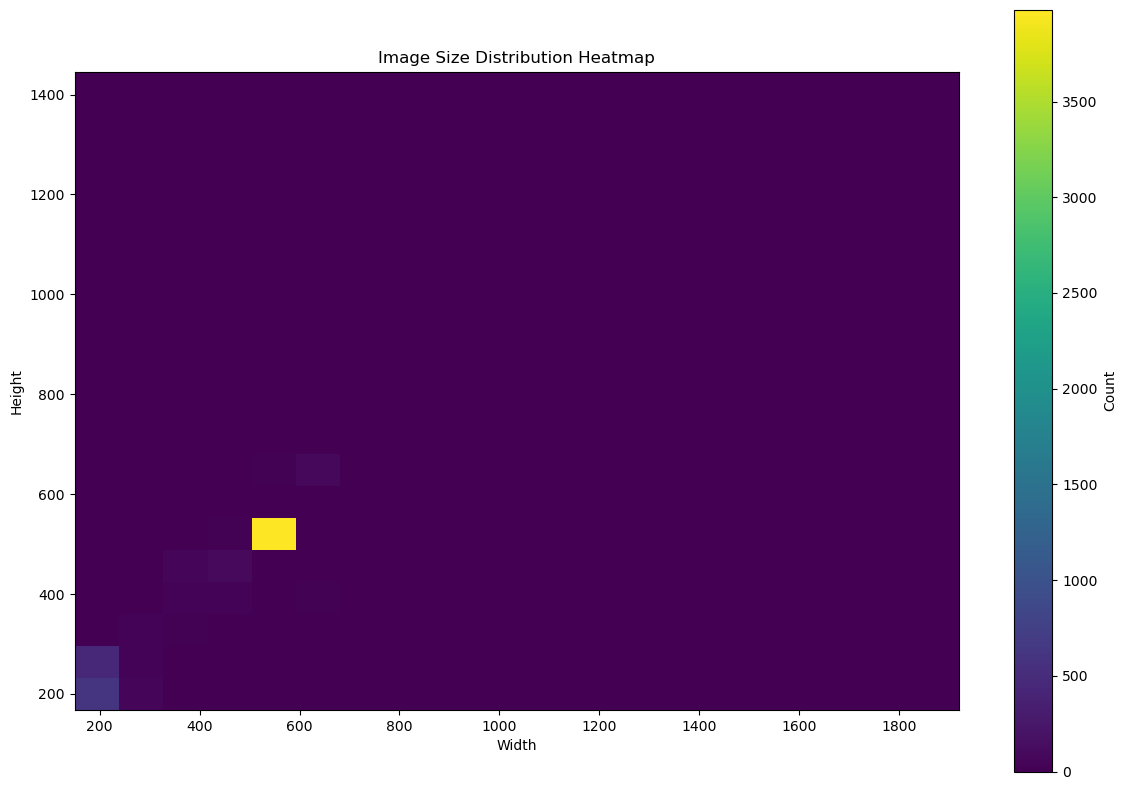

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from collections import defaultdict
import cv2
from scipy import stats

def create_feature_matrix(dataset_info, dataset_type='train'):
    """
    Create a feature matrix for heatmap analysis
    """
    data = defaultdict(list)
    
    # Get all class names
    class_names = list(dataset_info[dataset_type]['class_distribution'].keys())
    
    # Prepare data for each image
    for i in range(len(dataset_info[dataset_type]['image_sizes'])):
        # Basic features
        width, height = dataset_info[dataset_type]['image_sizes'][i]
        data['width'].append(width)
        data['height'].append(height)
        data['aspect_ratio'].append(dataset_info[dataset_type]['aspect_ratios'][i])
        data['file_size'].append(dataset_info[dataset_type]['file_sizes'][i])
        
        # Image properties
        data['brightness'].append(dataset_info[dataset_type]['brightness_values'][i])
        data['contrast'].append(dataset_info[dataset_type]['contrast_values'][i])
        
        # Color channels
        for color in ['R', 'G', 'B']:
            data[f'{color}_channel'].append(dataset_info[dataset_type]['color_distributions'][color][i])
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    return df

def plot_heatmaps(dataset_info):
    """
    Create various heatmap visualizations
    """
    # Create feature matrix
    df_train = create_feature_matrix(dataset_info, 'train')
    
    # 1. Correlation Heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_train.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True, linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    # 2. Class-wise Feature Distribution Heatmap
    class_names = list(dataset_info['train']['class_distribution'].keys())
    feature_names = ['file_size', 'brightness', 'contrast', 'aspect_ratio']
    
    class_feature_matrix = np.zeros((len(class_names), len(feature_names)))
    for i, class_name in enumerate(class_names):
        # Calculate average features for each class
        class_indices = []  # You'll need to modify the data structure to track class membership
        for feature_idx, feature in enumerate(feature_names):
            if feature in df_train.columns:
                class_feature_matrix[i, feature_idx] = df_train[feature].mean()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(class_feature_matrix, annot=True, cmap='viridis',
                xticklabels=feature_names, yticklabels=class_names,
                fmt='.2f', linewidths=0.5)
    plt.title('Class-wise Feature Distribution Heatmap')
    plt.tight_layout()
    plt.show()
    
    # 3. Color Channel Intensity Heatmap
    color_channels = ['R_channel', 'G_channel', 'B_channel']
    class_color_matrix = np.zeros((len(class_names), len(color_channels)))
    for i, class_name in enumerate(class_names):
        for j, channel in enumerate(color_channels):
            class_color_matrix[i, j] = df_train[channel].mean()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(class_color_matrix, annot=True, cmap='YlOrRd',
                xticklabels=color_channels, yticklabels=class_names,
                fmt='.2f', linewidths=0.5)
    plt.title('Class-wise Color Channel Intensity Heatmap')
    plt.tight_layout()
    plt.show()
    
    # 4. Image Size Distribution Heatmap
    plt.figure(figsize=(12, 8))
    size_hist, xedges, yedges = np.histogram2d(
        df_train['width'], 
        df_train['height'],
        bins=20
    )
    plt.imshow(size_hist.T, origin='lower', cmap='viridis',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.colorbar(label='Count')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Image Size Distribution Heatmap')
    plt.tight_layout()
    plt.show()

# Add this to your existing analyze_image_dataset function
def analyze_image_dataset(train_dir, test_dir):
    """
    Enhanced version of analyze_image_dataset that includes class labels
    """
    dataset_info = {
        'train': defaultdict(list),
        'test': defaultdict(list)
    }
    
    for dataset_type, directory in [('train', train_dir), ('test', test_dir)]:
        print(f"\nAnalyzing {dataset_type} directory: {directory}")
        
        classes = os.listdir(directory)
        total_images = 0
        class_distribution = {}
        image_sizes = []
        aspect_ratios = []
        file_sizes = []
        brightness_values = []
        contrast_values = []
        color_distributions = {'R': [], 'G': [], 'B': []}
        class_labels = []  # Add this to track class membership
        
        for class_name in classes:
            class_path = os.path.join(directory, class_name)
            if not os.path.isdir(class_path):
                continue
                
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            num_images = len(images)
            total_images += num_images
            class_distribution[class_name] = num_images
            
            for img_name in images:
                img_path = os.path.join(class_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_sizes.append((width, height))
                        aspect_ratios.append(width/height)
                    
                    file_sizes.append(os.path.getsize(img_path) / (1024 * 1024))
                    
                    img_cv = cv2.imread(img_path)
                    if img_cv is not None:
                        brightness = np.mean(img_cv)
                        brightness_values.append(brightness)
                        
                        contrast = np.std(img_cv)
                        contrast_values.append(contrast)
                        
                        for i, color in enumerate(['B', 'G', 'R']):
                            color_distributions[color].append(np.mean(img_cv[:,:,i]))
                        
                        class_labels.append(class_name)  # Add class label
                    
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")
        
        dataset_info[dataset_type].update({
            'total_images': total_images,
            'class_distribution': class_distribution,
            'image_sizes': image_sizes,
            'aspect_ratios': aspect_ratios,
            'file_sizes': file_sizes,
            'brightness_values': brightness_values,
            'contrast_values': contrast_values,
            'color_distributions': color_distributions,
            'class_labels': class_labels  # Add to dataset_info
        })
    
    return dataset_info

def main():
    try:
        # Define your paths
        train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
        test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'
        
        # Run analysis
        dataset_info = analyze_image_dataset(train_dir, test_dir)
        
        # Create heatmap visualizations
        plot_heatmaps(dataset_info)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check if the directory paths are correct and accessible.")

if __name__ == "__main__":
    main()

In [4]:
pip install numpy matplotlib Pillow pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Paths to training and testing folders
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

def load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size):
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Load training and test data
    train_generator = datagen.flow_from_directory(
        train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    test_generator = datagen.flow_from_directory(
        test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    # Flatten images for ML models
    X_train, y_train = [], []
    for i in range(len(train_generator)):
        images, labels = train_generator[i]
        X_train.append(images.reshape(images.shape[0], -1))
        y_train.append(np.argmax(labels, axis=1))
        
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    
    X_test, y_test = [], []
    for i in range(len(test_generator)):
        images, labels = test_generator[i]
        X_test.append(images.reshape(images.shape[0], -1))
        y_test.append(np.argmax(labels, axis=1))
        
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test, axis=0)
    
    return X_train, X_test, y_train, y_test

# Preprocess data (use in each script)
X_train, X_test, y_train, y_test = load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
#SVM Accuracy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#kNN Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("kNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Decision Tree Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Random Forest Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Logistic Regression Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Naive Bayes Accuracy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Extra Trees Accuracy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

et_model = ExtraTreesClassifier(n_estimators=100)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
pip install matplotlib pandas


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Paths to training and testing folders
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

def load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size):
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Load training and test data
    train_generator = datagen.flow_from_directory(
        train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    test_generator = datagen.flow_from_directory(
        test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    # Flatten images for ML models
    X_train, y_train = [], []
    for i in range(len(train_generator)):
        images, labels = train_generator[i]
        X_train.append(images.reshape(images.shape[0], -1))
        y_train.append(np.argmax(labels, axis=1))
        
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    
    X_test, y_test = [], []
    for i in range(len(test_generator)):
        images, labels = test_generator[i]
        X_test.append(images.reshape(images.shape[0], -1))
        y_test.append(np.argmax(labels, axis=1))
        
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test, axis=0)
    
    return X_train, X_test, y_train, y_test

# Preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size)

# List of models to evaluate
models = {
    "SVM": SVC(),
    "kNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100)
}

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_test, y_pred))

# Bar graph for model comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
SVM Accuracy: 0.8871
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       300
           1       0.82      0.76      0.79       306
           2       0.94      0.97      0.95       405
           3       0.91      0.97      0.94       300

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.88      0.89      0.89      1311

Confusion Matrix for SVM:
 [[248  44   0   8]
 [ 29 232  27  18]
 [  8   4 391   2]
 [  5   3   0 292]]
--------------------------------------------------
kNN Accuracy: 0.9016
Classification Report for kNN:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       300
           1       0.92      0.69      0.79       306
           2       0.92      0.95      0.94       405
   

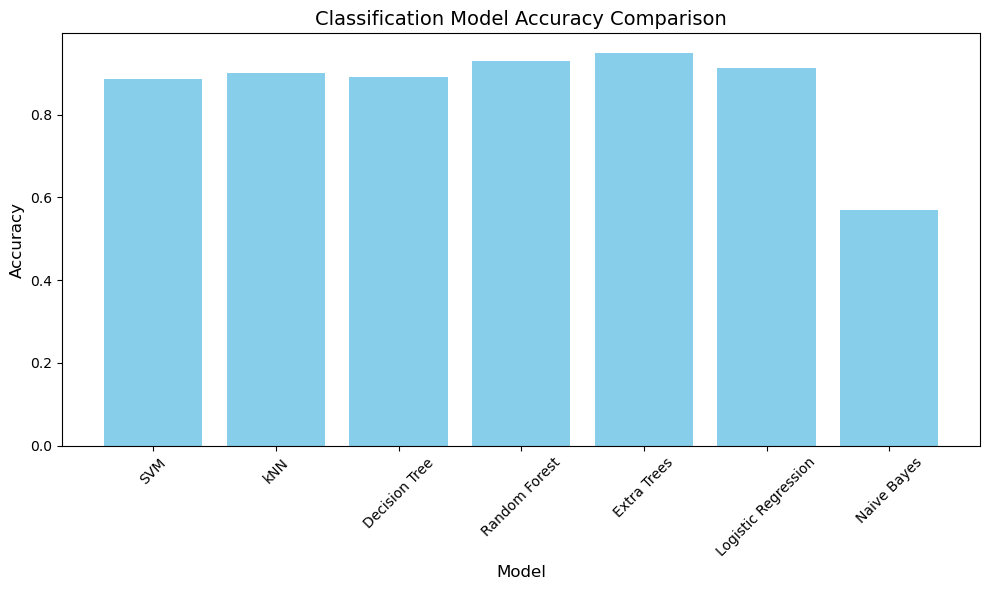

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import shap

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Paths to training and testing folders
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

def load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size):
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Load training and test data
    train_generator = datagen.flow_from_directory(
        train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    test_generator = datagen.flow_from_directory(
        test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    # Flatten images for ML models
    X_train, y_train = [], []
    for i in range(len(train_generator)):
        images, labels = train_generator[i]
        X_train.append(images.reshape(images.shape[0], -1))
        y_train.append(np.argmax(labels, axis=1))
        
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    
    X_test, y_test = [], []
    for i in range(len(test_generator)):
        images, labels = test_generator[i]
        X_test.append(images.reshape(images.shape[0], -1))
        y_test.append(np.argmax(labels, axis=1))
        
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test, axis=0)
    
    return X_train, X_test, y_train, y_test

# Preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size)

# Define and evaluate classification models
models = {
    "SVM": SVC(),
    "kNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Classification Model Accuracy Comparison', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Random Forest Accuracy: 0.6048
Generating SHAP explanations...


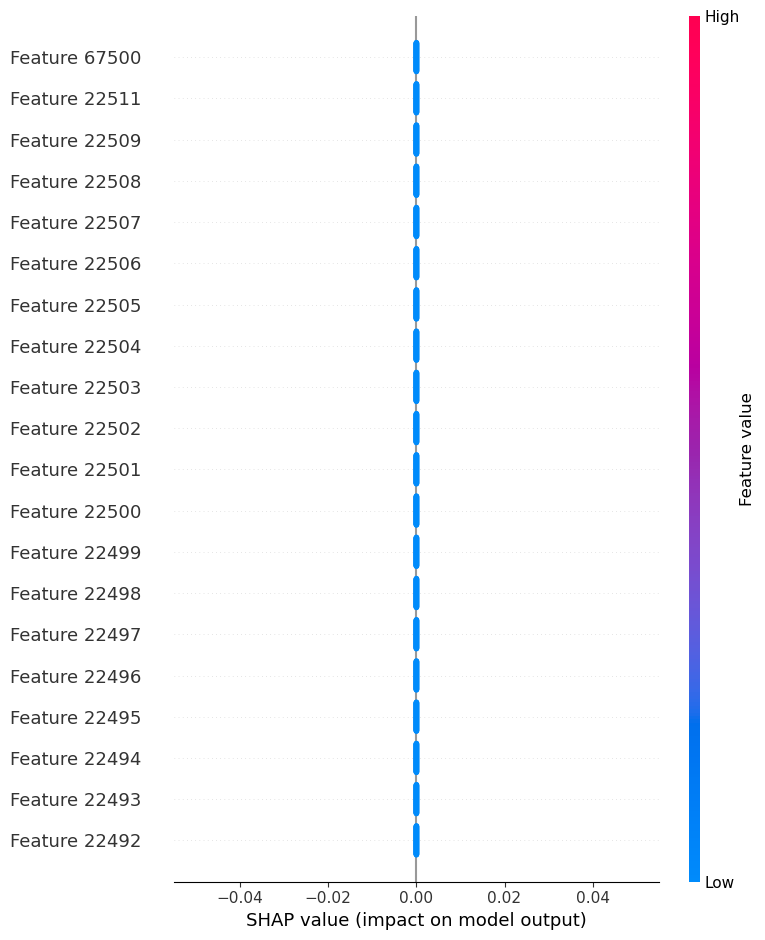

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Paths to training and testing folders
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Function to load and preprocess data
def load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size, max_samples=500):
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Load training and test data
    train_generator = datagen.flow_from_directory(
        train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    test_generator = datagen.flow_from_directory(
        test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', shuffle=False)
    
    # Limit samples for faster processing
    X_train, y_train = [], []
    for i in range(min(len(train_generator), max_samples // batch_size)):
        images, labels = train_generator[i]
        X_train.append(images.reshape(images.shape[0], -1))
        y_train.append(np.argmax(labels, axis=1))
        
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    
    X_test, y_test = [], []
    for i in range(min(len(test_generator), max_samples // batch_size)):
        images, labels = test_generator[i]
        X_test.append(images.reshape(images.shape[0], -1))
        y_test.append(np.argmax(labels, axis=1))
        
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test, axis=0)
    
    return X_train[:max_samples], X_test[:max_samples], y_train[:max_samples], y_test[:max_samples]

# Load and preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data(train_dir, test_dir, img_width, img_height, batch_size)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# SHAP Explanation
print("Generating SHAP explanations...")
explainer_shap = shap.Explainer(rf_model, X_train)
shap_values = explainer_shap(X_test[:100])  # Limiting to a subset for performance

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test[:100], feature_names=[f"Feature {i+1}" for i in range(X_train.shape[1])])



In [3]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Use SHAP to explain a Random Forest model as an example
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_flat, y_train)

# Select a subset of the validation data for SHAP explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_flat)

# Plot SHAP summary for all features
shap.summary_plot(shap_values, X_val_flat)

# Plot SHAP bar plot for feature importance
shap.summary_plot(shap_values, X_val_flat, plot_type="bar")

# Explain individual features for a single prediction
instance_index = 0
for feature_index in range(X_val_flat.shape[1]):
    print(f"Feature {feature_index} SHAP Value: {shap_values[0][instance_index][feature_index]}")
    print(f"Feature {feature_index} Base Value: {explainer.expected_value[0]}")


NameError: name 'X_train_flat' is not defined

Random Forest Accuracy: 0.7600
Unique classes in training data: [0 1 2]

Generating LIME explanations...
Prediction for instance 0: Class 0 with probabilities [[0.64 0.06 0.3 ]]


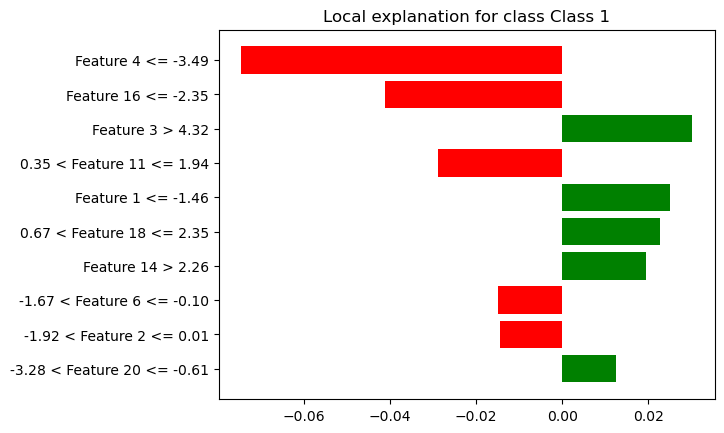

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data for demonstration
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=3,  # Multi-class classification
    random_state=42
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Check unique classes in the training data
unique_classes = np.unique(y_train)
print(f"Unique classes in training data: {unique_classes}")

# LIME Explanation
if len(unique_classes) > 1:  # Proceed only if more than one class exists
    print("\nGenerating LIME explanations...")
    
    # Initialize LimeTabularExplainer
    lime_explainer = LimeTabularExplainer(
        X_train,
        training_labels=y_train,
        class_names=[f"Class {i}" for i in unique_classes],
        feature_names=[f"Feature {i+1}" for i in range(X_train.shape[1])],
        mode='classification'
    )

    # Choose an instance from the test set for explanation
    instance_idx = 0  # Index of the instance to explain
    instance = X_test[instance_idx]
    
    # Get the prediction probabilities for the instance
    predicted_proba = rf_model.predict_proba(instance.reshape(1, -1))
    predicted_class = np.argmax(predicted_proba)
    print(f"Prediction for instance {instance_idx}: Class {predicted_class} with probabilities {predicted_proba}")

    # Explain the instance
    exp = lime_explainer.explain_instance(
        instance,
        rf_model.predict_proba,
        num_features=10
    )

    # Display the explanation
    exp.show_in_notebook(show_table=True)
    exp.as_pyplot_figure()
    plt.show()
else:
    print("Skipping LIME explanations as only one class is detected in the training data.")


In [6]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import os

# Dataset loading and preprocessing
def load_dataset(train_dir):
    data = []
    labels = []

    for cls in os.listdir(train_dir):
        class_path = os.path.join(train_dir, cls)
        for img_file in os.listdir(class_path):
            if img_file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(class_path, img_file)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                data.append(img_array)
                labels.append(cls)

    data = np.array(data, dtype="float32") / 255.0
    labels = np.array(labels)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return data, labels, label_encoder

# Define your dataset path
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
data, labels, label_encoder = load_dataset(train_dir)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Flatten the data for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_flat, y_train)

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat,
    training_labels=y_train,
    feature_names=[f"Feature {i}" for i in range(X_train_flat.shape[1])],
    class_names=label_encoder.classes_,
    mode="classification"
)

# Select a single instance to explain
instance_index = 0
instance = X_val_flat[instance_index]

# Generate explanation for the instance
explanation = explainer.explain_instance(
    instance, 
    model.predict_proba, 
    num_features=10
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# Save explanation as an HTML file
explanation.save_to_file("lime_explanation.html")

# Print explanation details
print("Explanation for instance:")
print(explanation.as_list())

Explanation for instance:
[('-0.12 < Feature 4491 <= 0.32', 0.005829557062144122), ('-0.15 < Feature 3346 <= 0.34', 0.004854415519906563), ('-0.96 < Feature 8411 <= -0.10', 0.004512925524265435), ('Feature 7857 <= -0.46', 0.004138756233548961), ('-0.49 < Feature 645 <= -0.45', -0.0035796627513408337), ('-0.10 < Feature 10856 <= 0.44', 0.0033782981036342185), ('Feature 2344 <= -0.66', 0.003366722091880504), ('Feature 4609 <= -0.22', 0.003003002073183641), ('-0.10 < Feature 10855 <= 0.44', -0.002808724231804819), ('-0.39 < Feature 9388 <= -0.19', -0.0024163810476143656)]


In [7]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
import os

# Dataset loading and preprocessing
def load_dataset(train_dir):
    data = []
    labels = []

    for cls in os.listdir(train_dir):
        class_path = os.path.join(train_dir, cls)
        for img_file in os.listdir(class_path):
            if img_file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(class_path, img_file)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                data.append(img_array)
                labels.append(cls)

    data = np.array(data, dtype="float32") / 255.0
    labels = np.array(labels)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return data, labels, label_encoder

# Define your dataset path
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
data, labels, label_encoder = load_dataset(train_dir)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Flatten the data for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

# Base models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Meta-classifier
logistic_regression = LogisticRegression(max_iter=500, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('decision_tree', decision_tree)
    ],
    final_estimator=logistic_regression
)

# Train the stacking classifier
stacking_model.fit(X_train_flat, y_train)

# Make predictions
predictions = stacking_model.predict(X_val_flat)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"Stacking Classifier Accuracy: {accuracy:.2f}")
print(classification_report(y_val, predictions))


Stacking Classifier Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       288
           1       0.86      0.85      0.86       265
           2       0.95      0.99      0.97       291
           3       0.93      0.97      0.95       299

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [1]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
import os

# Dataset loading and preprocessing
def load_dataset(train_dir):
    data = []
    labels = []

    for cls in os.listdir(train_dir):
        class_path = os.path.join(train_dir, cls)
        for img_file in os.listdir(class_path):
            if img_file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(class_path, img_file)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                data.append(img_array)
                labels.append(cls)

    data = np.array(data, dtype="float32") / 255.0
    labels = np.array(labels)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return data, labels, label_encoder

# Define your dataset path
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
data, labels, label_encoder = load_dataset(train_dir)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Flatten the data for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

# Base models
logistic_regression = LogisticRegression(max_iter=500, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression),
        ('random_forest', random_forest)
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42)
)

# Train the stacking classifier
stacking_model.fit(X_train_flat, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_val_flat)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_val, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}")
print("Classification Report for Stacking Classifier:")
print(classification_report(y_val, stacking_predictions))


Stacking Classifier Accuracy: 0.93
Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       288
           1       0.86      0.85      0.85       265
           2       0.95      0.99      0.97       291
           3       0.94      0.98      0.96       299

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

